# Algoritmos de optimización - Trabajo Práctico

Nombre y Apellidos: Carlos Javier Bravo Intriago

Url: https://github.com/carlosbravo1408/03MIAR-Algoritmos-de-Optimizacion-2025/tree/main/TrabajoPractico

Google Colab: https://colab.research.google.com/drive/1sL-JQNLWrSvi7AClDDCCAd8KLOow6wYY?usp=sharing

## Problema:
>1. Sesiones de doblaje <br>
<!--
>2. Organizar los horarios de partidos de una jornada de La Liga<br>
>3. Configuración de Tribunales
-->
## Descripción del problema:

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en
las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el
estudio de grabación independientemente del número de tomas que se graben. No es
posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de
manera que el gasto por los servicios de los actores de doblaje sea el menor posible. Los
datos son:

> Número de actores: 10 <br>
> Número de tomas : 30 <br>
> Actores/Tomas : https://bit.ly/36D8IuK
> - 1 indica que el actor participa en la toma
> - 0 en caso contrario


In [ ]:
import os
import math
import random
from typing import List, Set, Tuple, Union, Optional, Literal, FrozenSet
import pickle
import matplotlib.pyplot as plt
from collections import Counter

import pandas as pd

SolutionType = List[int]
NumericType = Union[float, int]
TakesType = List[Set[int]]
MAX_TOMAS_POR_DIA = 6

MATRIZ = [
    # Actores                       Tomas
    #0  1  2  3  4  5  6  7  8  9
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # 00
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],  # 01
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],  # 02
    [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],  # 03
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],  # 04
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],  # 05
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],  # 06
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],  # 07
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # 08
    [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],  # 09
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],  # 10
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],  # 11
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],  # 12
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],  # 13
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],  # 14
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],  # 15
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # 16
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  # 17
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # 18
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],  # 19
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],  # 20
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],  # 21
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # 22
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  # 23
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],  # 24
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],  # 25
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],  # 26
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # 27
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],  # 28
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # 29
]

TOMAS = [
    {i for i, val in enumerate(MATRIZ[j]) if val == 1}
    for j in range(len(MATRIZ))
]

soluciones_unicas_path = "./soluciones_unicas"
if os.path.exists(soluciones_unicas_path):
    with open(soluciones_unicas_path, "rb") as f:
        soluciones_unicas = pickle.load(f)
else:
    soluciones_unicas = set()

# Modelo

## ¿Cómo representó el espacio de soluciones?

Dado que no hay _garantía_ de que el número de días requerido para llegar a
un mínimo global sea $\lceil 30/6 \rceil = 5$, y en el peor escenario es que
se requieran $30$ días (un día por toma). El espacio de soluciones se lo
representa mediante una estructura tipo Vector de Asignación.

### La estructura de datos propuesta:
Se propone un arreglo unidimensional de longitud fija $N=30$.
$$
S=[d_0, d_1, d_2, ..., d_{29}]
$$
Donde:
* El índice `i` representa a la **Toma** de número `i` (de 0 a 29, 30 tomas en
total).
* El valor `S[i]` representa el **Día** asignado a esa toma (un entero $k\ge 0$)

<div style="flex: 0 0 50px; text-align: center;">
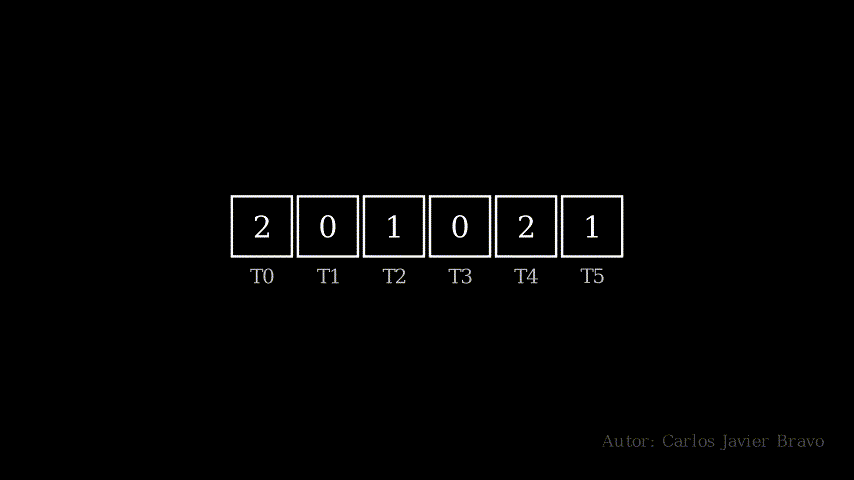
<p style="text-align: center; font-size: 0.85em; margin-top: 5px; line-height: 1.2;">Fig 1. Modelo para el problema de asignación de tomas.</p>
</div>

### Ventajas de esta estructura propuesta:
* Al definir como _array_ a la solución, y al definir que el índice sea la
toma, es nula la probabilidad dejar una toma sin asignar, o asignar una toma
dos días a la vez.
* El espacio tiene $N=30$ dimensiones. Cada dimensión es una variable que
puede tomar valores discretos entre 0 y $d_{max}$ (donde $d_{max}$ es el
máximo número de días requerido para las tomas).

## ¿Cuál es la función objetivo?

La función objetivo del problema de asignación de doblaje es de
**Minimización**. Se busca minimizar el Costo total de Apariciones, o dicho
de otra manera, minimizar la suma total de los días de sueldos pagados. Cada
sueldo se representará como $1$ unidad monetaria.

$$
\sum_{n=1}^{N} \left( \text{Número de actores únicos presentes en el Día } n
\right)
$$

Donde $N$ es el número de días necesarios para cumplir la minimización de
sueldos pagados.




## ¿Cómo implemento las restricciones?

### Restricción de coincidencias de actores
El costo no es lineal respecto a las tomas realizadas. Por ejemplo:
* Si el Actor A graba 1 toma hoy $\to$ Costo = 1.
* Si el Actor A graba 6 tomas hoy $\to$ Costo = 1.
* El objetivo es explotar esta "tarifa plana" reduciendo al mínimo el costo
total.

### Restricción de agrupación única:
Cada toma debe grabarse exactamente un día. No puede quedarse sin grabar o
grabarse dos veces.

Al definir a la estructura de datos para este problema como un _array_
unidimensional, implícitamente se resuelve esta restricción debido al diseño.

### Restricción al número de tomas por día:
Se procura que el número de veces que se repita el día $d_i$ no supere a 6.
Esto se controla en las generaciones de nuevas vecindades.

# Análisis

## ¿Qué complejidad tiene el problema? Orden de complejidad y Contabilizar el espacio de soluciones

### Complejidad del problema y Orden de complejidad:

Este problema pertenece a la clase de complejidad **NP-Hard**, lo que
significa que **no** hay un algoritmo conocido que pueda resolverlo en tiempo
polinomial. Pero si se puede verificar cualquier solución en un tiempo
polinómico, en este caso simplemente se suma los actores y se revisa la
restricción de 6 tomas máximas por día.

Si se tratase de resolver por _fuerza bruta_, la complejidad para este
problema es exponencial.

Sea:
* $N = 30$ numero de tomas
* $D \approx 5 \text{ a } 10$ el número estimado de días necesarios.

El espacio de búsqueda (asignar cada toma a uno de los $D$ días) tiene un
orden de magnitud de:

$$
O(D^N)
$$

### Contabilización del espacio de Soluciones:
Partamos del caso _ideal_ donde cada día tiene 6 tomas cada uno, en cuyo caso
el espacio de soluciones viene dado por:
$$
\text{Escenario 6 tomas por día} = \binom{30}{6} \times \binom{24}{6} \times
\binom{18}{6} \times \binom{12}{6} \times \binom{6}{6}
$$
Esto contemplaría la opción de que se requieran $\lceil 30/6 \rceil = 5$ días
 como jornada para el doblaje de distintas escenas.

Resolviendo el producto anterior:
* Día 1: $593775$
* Día 2: $134596$
* Día 3: $18564$
* Día 4: $924$
* Día 5: $1$
* Total de combinaciones posibles: $1370874167589326400$

No obstante, en el número total de combinaciones se han incluido una serie de
diferentes soluciones que en realidad son equivalentes o iguales entre sí.
Esto se debe a que el orden de las jornadas de grabación tampoco es de
importancia. Por lo que al número total de combinaciones se debe dividir
por el factorial del número de grupos (5!). Por tanto, el tamaño total de
espacio de soluciones bajo esta restricción es:
$$
\frac{1370874167589326400}{5!} = 11423951396577720
$$

#### El espacio de búsqueda lo más cercano a la realidad:
Se propone que se debe acotar la búsqueda a un número máximo de $D$ días
(peor escenario serían 30 días, una toma diaria).

Cada toma puede ir a cualquiera de los $D$ días.
$$
\text{Espacio Total} \approx D^{30}
$$

Por ejemplo: Si $D=10$, entonces: $10^{30} = 1\times 10^{30}$
Sin embargo, dentro de las $10^{30}$ posibilidades, muchas de estas son
soluciones inválidas (porque asignan $>6$ tomas a un día). El espacio de
soluciones factibles es menor, y un algoritmo _determinista_ probablemente
navegue por todo ese espacio total. Debido a esto se hará uso de estrategias
heurísticas para buscar llegar al mínimo global, sin tener que explorar todo
el espacio de solución teórico.

# Diseño

## ¿Qué técnica utilizo? ¿Por qué?

Para este problema se plantea usar por estrategias separadas la **Búsqueda
local con entornos Variables (VNS)** y el **Recocido Simulado**.

### Motivo por el cual se ha elegido Búsqueda local con entornos variables (VNS)
Se implementa una estrategia combinada entre búsqueda local agregando
mecanismos de escape (_shaking_ o perturbaciones) para tratar de escapar
cuando la misma búsqueda local se queda estancada.

<div style="flex: 0 0 100px; text-align: center;">
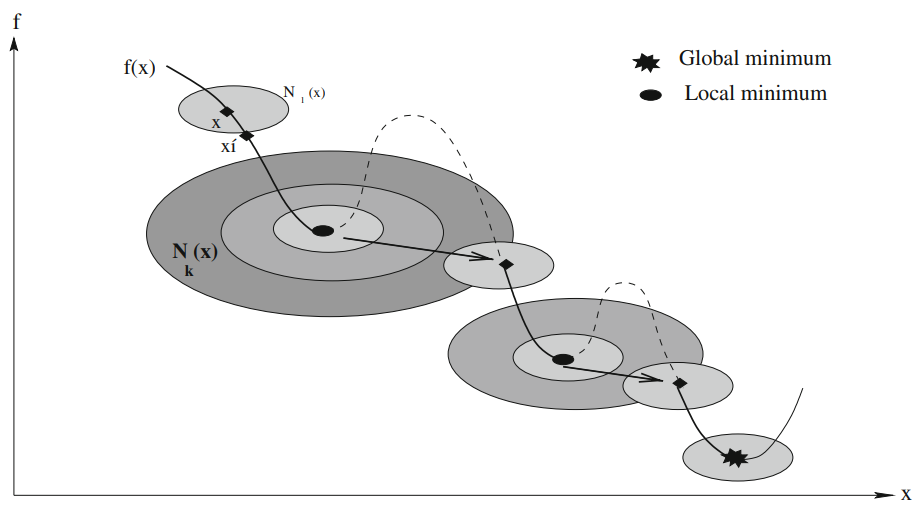
<p style="text-align: center; font-size: 0.85em; margin-top: 5px;
line-height: 1.2;">Fig 2. Representación del algoritmo VNS.
<i>Tomado de <a href="ref1">[1, Fig. 1]</a></p>
</div>

#### Generación de nueva vecindad:
Como se mencionó previamente, en el peor escenario podrían existir como
soluciones aquellas que requieran una toma por día, no existe una cota o
restricción definida con respecto al número de días requeridos para minimizar
los sueldos a pagar.

La generación de vecindad permite _mover_ una toma existente en algún día que
ya tenga asignado previamente tomas y aún no supere el máximo de $6$ tomas
por día, por otra parte, también permite _mover_ una toma en un nuevo día,
y evalúa si con este aumento de días representa una reducción del coste final.

#### Estrategias para salir de soluciones locales:
Parte del algoritmo VNS es implementar estrategias de perturbaciones o
_shaking_ a una solución en concreto. Para tratar de salir de los mínimos
locales se propone 3 posibles estrategias o perturbaciones $k$.
* $k=0$: Se trata de mover una toma de un día a otro sin violar la
restricción de máximo 6 tomas por día (puede crear un día más aleatoriamente).
* $k=1$: Se intercambian 2 tomas de días distintos (esto no viola la
restricción de máximo 6 tomas por día).
* $k>=2$: Se ejecuta $k+1$ la acción de mover tomas con la posibilidad de
crear nuevos días aleatoriamente


In [ ]:
def costo_total(solucion: SolutionType, tomas: TakesType) -> int:
    """
    Cálculo del costo total a la solución de entrada. Los actores de doblaje
    cobran todos la misma cantidad por cada día que deben desplazarse hasta
    el estudio de grabación independientemente del número de tomas que se graben
    :param solucion:
    :param tomas:
    :return:
    """
    actores_por_dia = [set() for _ in range(max(solucion) + 1)]
    for toma, dia in enumerate(solucion):
        actores_por_dia[dia].update(tomas[toma])
    return sum(len(s) for s in actores_por_dia)

def generar_solucion_aleatoria(num_tomas: int) -> SolutionType:
    """
    Se crea una Solución aleatoria con base en la estructura de datos sugerida
    :param num_tomas:
    :return:
    """
    return random.sample(list(range(num_tomas)), num_tomas)

def normalizar_solucion(solucion: SolutionType) -> SolutionType:
    """
    La solución cruda en las distintas operaciones de expansión o reducción
    de días con el fin de minimizar el costo total, suele retirar "días",
    rompiendo la continuidad numerica. Como el orden de las jornadas de
    grabación tampoco es de importancia, se procede a renumerar los días de
    la solución de entrada.

    >>> normalizar_solucion([0, 2, 2, 8, 5, 7, 1, 1, 0])\n
    >>> output: [0, 2, 2, 5, 3, 4, 1, 1, 0]
    :param solucion:
    :return:
    """
    dias_usados = sorted(list(set(solucion)))
    mapa_dias = {dia_viejo: nuevo_indice for nuevo_indice, dia_viejo in enumerate(dias_usados)}
    solucion_normalizada = [mapa_dias[dia] for dia in solucion]
    return solucion_normalizada

def convertir_solucion(solucion: SolutionType) -> FrozenSet[FrozenSet[int]]:
    """
    Método que convierte la respuesta en formato Vector de Asignación a un
    formato que permita fácilmente comparar soluciones iguales o equivalentes
    (isomorfismo). \n
    La estructura que retorna es FrozenSet, que tienen la peculiaridad de
    ser conjuntos o set de datos y estos a su vez son inmutables o congelados,
    pudiendo así tener un hash, útil para comparar si existe o no en un
    tiempo amortizado constante.\n
    >>> convertir_solucion([0, 2, 2, 3, 3, 4, 1, 1, 0, 4])
    >>> {{0, 8}, {6, 7}, {1, 2}, {3, 4}, {5, 9}}
    :param solucion:
    :return:
    """
    dias: List[List[int]] = [[] for _ in range(max(solucion) + 1)]
    for toma, dia in enumerate(solucion):
        dias[dia].append(toma)
    dias_congelados = [frozenset(tomas) for tomas in dias]
    return frozenset(dias_congelados)

def visualizar_solucion(solucion: SolutionType, tomas: TakesType) -> None:
    """
    Método que visualiza el resultado del formato Vector de asignación en una
    tabla de pandas.\n
    Código sugerido por Gemini 3.1 Pro con modificaciones hechas por el autor
    :param solucion:
    :param tomas:
    :return:
    """
    num_dias = max(solucion) + 1
    dias_agrupados = [[] for _ in range(num_dias)]
    for toma_id, dia_id in enumerate(solucion):
        dias_agrupados[dia_id].append(toma_id)
    max_slots = 6
    filas = []
    costo_total = 0

    for dia_id, tomas_del_dia in enumerate(dias_agrupados):
        tomas_del_dia.sort()
        fila = {"Jornada": f"Día {dia_id + 1}"}
        actores_dia = set()
        for slot in range(max_slots):
            col_name = f"Sesión Toma {slot+1}"
            if slot < len(tomas_del_dia):
                toma_id = tomas_del_dia[slot]
                actores = sorted(list(tomas[toma_id]))
                actores_str = ",".join(map(str, actores))
                fila[col_name] = f"Toma {toma_id}, Actores: {actores_str}"
                actores_dia.update(actores)
            else:
                fila[col_name] = ""
        c_dia = len(actores_dia)
        costo_total += c_dia
        fila["Costo"] = c_dia
        filas.append(fila)

    fila_total = {"Jornada": "Total"}
    for slot in range(max_slots):
        fila_total[f"Sesión Toma {slot+1}"] = ""
    fila_total["Costo"] = costo_total
    filas.append(fila_total)

    df = pd.DataFrame(filas)
    df.set_index("Jornada", inplace=True)
    display(df)


#### Búsqueda Local

In [3]:
def generar_vecina(
        tomas: TakesType,
        solucion_inicial: SolutionType,
        max_tomas_por_dia: int = MAX_TOMAS_POR_DIA
) -> Tuple[SolutionType, NumericType]:
    """
    Algoritmo que genera nueva vecindad procurando cumplir estas dos reglas:\n
    1. Minimizar el coste en unidades salariales.\n
    2. Verificar si el agregar un día extra a la solución puede llevar a una
       nueva solución con menor coste (no acotando duramente a 5 días).\n
    :param tomas:
    :param solucion_inicial:
    :param max_tomas_por_dia:
    :return:
    """
    mejor_solucion = list(solucion_inicial)

    mejor_costo = costo_total(mejor_solucion, tomas)

    dias_activos = set(mejor_solucion)
    max_dia_activos = max(dias_activos)

    # vemos si representa una mejora aumentar un dia mas
    posibles_dias = list(range(min(len(mejor_solucion), max_dia_activos + 2)))
    for toma in range(len(mejor_solucion)):
        dia_origen = mejor_solucion[toma]

        for dia_destino in posibles_dias:
            if dia_origen == dia_destino:
                continue
            tomas_destino = mejor_solucion.count(dia_destino)

            if tomas_destino >= max_tomas_por_dia:
                continue

            vecino = list(mejor_solucion)
            vecino[toma] = dia_destino
            costo_nuevo = costo_total(vecino, tomas)

            if costo_nuevo > mejor_costo:
                continue

            mejor_costo = costo_nuevo
            mejor_solucion = vecino

    # en el caso de reducir días en la solucion, esta tiende a romper la
    # continuidad numerica, por lo que requiere una "normalización"
    mejor_solucion = normalizar_solucion(mejor_solucion)
    return mejor_solucion, mejor_costo

solucion, costo = generar_vecina(TOMAS, generar_solucion_aleatoria(len(TOMAS)), max_tomas_por_dia=MAX_TOMAS_POR_DIA)
print(solucion, costo)

[6, 6, 6, 6, 6, 0, 0, 4, 1, 4, 3, 3, 6, 3, 4, 1, 3, 5, 3, 3, 5, 1, 2, 5, 1, 4, 0, 1, 4, 1] 35


In [4]:
def busqueda_local(
        tomas: TakesType,
        solucion_inicial: Optional[SolutionType] = None,
        max_tomas_por_dia: int = MAX_TOMAS_POR_DIA
) -> Tuple[SolutionType, NumericType]:
    """
    Realiza una búsqueda que tiende a converger a un minimo local.
    :param tomas:
    :param solucion_inicial:
    :param max_tomas_por_dia:
    :return:
    """
    if solucion_inicial is None:
        solucion_referencia = generar_solucion_aleatoria(len(tomas))
    else:
        solucion_referencia = list(solucion_inicial)
    mejor_costo = costo_total(solucion_referencia, tomas)

    while True:
        nueva_solucion, costo_vecina = generar_vecina(
            tomas,
            solucion_referencia,
            max_tomas_por_dia
        )

        if costo_vecina < mejor_costo:
            solucion_referencia = nueva_solucion  #Guarda la mejor solución encontrada
            mejor_costo = costo_vecina
        else:
            return solucion_referencia, mejor_costo

solucion, costo = busqueda_local(
    TOMAS,
    solucion_inicial=solucion,
    max_tomas_por_dia=MAX_TOMAS_POR_DIA
)
print(solucion, costo)

[5, 5, 4, 5, 5, 5, 0, 4, 0, 4, 3, 3, 0, 3, 5, 1, 4, 3, 2, 3, 3, 0, 0, 2, 1, 4, 0, 1, 4, 1] 33


#### Búsqueda con entornos Variables VNS

In [5]:
def mover_una_toma(
        solucion: SolutionType,
        max_tomas: int = MAX_TOMAS_POR_DIA
) -> Tuple[SolutionType, bool]:
    """
    Perturbación o agitación que trata de mover una toma de un día a otro sin
    violar la restricción de máximo 6 tomas por día (puede crear un día más
    aleatoriamente).
    :param solucion:
    :param max_tomas:
    :return:
    """
    solucion_vecina = list(solucion)
    num_tomas = len(solucion_vecina)
    while True:
        toma_random = random.randint(0, num_tomas - 1)
        dia_actual = solucion_vecina[toma_random]
        max_dia = max(solucion_vecina)
        # vemos si representa una mejora aumentar un dia mas
        dia_destino = random.randint(0, max_dia + 2)
        if dia_actual != dia_destino and solucion_vecina.count(dia_destino) < max_tomas:
            solucion_vecina[toma_random] = dia_destino
            return solucion_vecina, True

def swap(solucion: SolutionType) -> SolutionType:
    """
    Perturbación o agitación que intercambian 2 tomas aleatorias de días
    distintos (esto no viola la restricción de máximo 6 tomas por día).

    :param solucion:
    :return:
    """
    solucion_vecina = list(solucion)
    num_tomas = len(solucion_vecina)
    while True:
        toma_a = random.randint(0, num_tomas - 1)
        toma_b = random.randint(0, num_tomas - 1)
        dia_a = solucion_vecina[toma_a]
        dia_b = solucion_vecina[toma_b]
        if dia_a != dia_b:
            solucion_vecina[toma_a] = dia_b
            solucion_vecina[toma_b] = dia_a
            return solucion_vecina

def fusionar_dias(
        solucion: SolutionType,
        intensidad: int,
        max_tomas: int = MAX_TOMAS_POR_DIA,
        max_intentos: int = 50
) -> SolutionType:
    """
    Perturbación o agitación que ejecuta k+1 la acción de mover tomas con la
    posibilidad de crear nuevos días aleatoriamente
    :param solucion:
    :param intensidad:
    :param max_tomas:
    :param max_intentos:
    :return:
    """
    solucion_vecina = list(solucion)
    num_tomas = len(solucion_vecina)
    movimientos_exitosos = 0
    intentos = 0
    while movimientos_exitosos < intensidad + 1 and intentos < max_intentos:
        toma_random = random.randint(0, num_tomas - 1)
        dia_destino = random.randint(0, max(solucion_vecina) + 2)
        if solucion_vecina[toma_random] != dia_destino and solucion_vecina.count(dia_destino) < max_tomas:
            solucion_vecina[toma_random] = dia_destino
            movimientos_exitosos += 1
        intentos += 1
    return solucion_vecina

def perturbar(
        solucion: SolutionType,
        intensidad: Literal[0, 1, 2, 3],
        max_tomas: int = MAX_TOMAS_POR_DIA,
) -> SolutionType:
    if intensidad == 0:
        return mover_una_toma(solucion, max_tomas)[0]
    elif intensidad == 1:
        return swap(solucion)
    return fusionar_dias(solucion, intensidad, max_tomas)

In [6]:
def busqueda_local_con_entornos_variables(
        tomas: List[Set[int]],
        solucion_inicial: Optional[SolutionType] = None,
        max_tomas: int = MAX_TOMAS_POR_DIA,
        max_iter: int = 1000,
        verbose: bool = False
) -> Tuple[SolutionType, NumericType]:
    """
    Realiza una búsqueda de tal manera que si se "estanca" en un minimo
    local, agrega una perturbación de nivel **k** para tratar de salir de
    dicho minimo local, permitiendo asi explorar nuevas soluciones con
    menores costes.
    :param tomas:
    :param solucion_inicial:
    :param max_tomas:
    :param max_iter:
    :param verbose:
    :return:
    """
    if solucion_inicial:
        solucion_actual = list(solucion_inicial)
    else:
        solucion_actual = generar_solucion_aleatoria(len(tomas))
    mejor_costo = costo_total(solucion_actual, tomas)
    k_max = 3
    iteracion = 0
    if verbose:
        print(
            "En la iteración ", iteracion,
            ", la solución inicial es:", solucion_actual
        )
        print("Costo: ", mejor_costo)

    while iteracion <= max_iter:
        k = 0
        while k <= k_max and iteracion <= max_iter:
            iteracion += 1
            vecino = perturbar(solucion_actual, k)
            vecino_mejorado, costo_vecino = busqueda_local(tomas, vecino, max_tomas)
            if costo_vecino < mejor_costo:
                solucion_actual = vecino_mejorado
                mejor_costo = costo_vecino
                k_prev = k
                k = 0
                if verbose:
                    print(
                        "En la iteración ", iteracion,
                        " con perturbacion ", k_prev,
                        ", la mejor solución encontrada es:", solucion_actual
                    )
                    print("Costo: ", costo_vecino)
            else:
                k += 1
    return solucion_actual, mejor_costo

In [7]:
sol_vns, dist_vns = busqueda_local_con_entornos_variables(TOMAS, max_iter=2000, verbose=True)
visualizar_solucion(sol_vns, TOMAS)

En la iteración  0 , la solución inicial es: [0, 25, 12, 26, 9, 8, 5, 27, 28, 18, 6, 13, 2, 11, 20, 23, 24, 1, 17, 10, 29, 7, 22, 16, 21, 4, 19, 15, 3, 14]
Costo:  94
En la iteración  1  con perturbacion  0 , la mejor solución encontrada es: [0, 0, 4, 1, 2, 0, 0, 4, 2, 4, 1, 0, 0, 3, 4, 2, 1, 3, 3, 1, 4, 1, 3, 3, 2, 4, 1, 2, 3, 2]
Costo:  30
En la iteración  6  con perturbacion  0 , la mejor solución encontrada es: [0, 0, 4, 4, 1, 0, 0, 2, 2, 4, 1, 0, 0, 3, 4, 2, 1, 3, 3, 1, 4, 1, 3, 3, 2, 4, 1, 2, 3, 2]
Costo:  29
En la iteración  55  con perturbacion  0 , la mejor solución encontrada es: [0, 0, 4, 4, 1, 0, 0, 2, 2, 4, 1, 0, 0, 3, 4, 2, 3, 3, 3, 1, 4, 1, 3, 3, 2, 1, 1, 2, 4, 2]
Costo:  28
En la iteración  207  con perturbacion  3 , la mejor solución encontrada es: [4, 0, 3, 3, 4, 4, 4, 3, 1, 0, 4, 0, 4, 2, 3, 1, 2, 2, 2, 0, 3, 0, 2, 2, 1, 0, 1, 1, 3, 1]
Costo:  27


,Sesión Toma 1,Sesión Toma 2,Sesión Toma 3,Sesión Toma 4,Sesión Toma 5,Sesión Toma 6,Costo
Jornada,,,,,,,
Día 1,"Toma 1, Actores: 2,3,4","Toma 9, Actores: 0,1,5,8","Toma 11, Actores: 0,1,2,3,5","Toma 19, Actores: 0,2,3,4","Toma 21, Actores: 0,1,2,3","Toma 25, Actores: 0,2,4,8",7
Día 2,"Toma 8, Actores: 0,1,3","Toma 15, Actores: 3,9","Toma 24, Actores: 0,1,3,9","Toma 26, Actores: 3,4","Toma 27, Actores: 0,3","Toma 29, Actores: 0,3",5
Día 3,"Toma 13, Actores: 0,2,5","Toma 16, Actores: 0,2","Toma 17, Actores: 2,5","Toma 18, Actores: 0,2","Toma 22, Actores: 0,2","Toma 23, Actores: 2,5",3
Día 4,"Toma 2, Actores: 1,4,6","Toma 3, Actores: 0,1,6,7","Toma 7, Actores: 0,1,5","Toma 14, Actores: 0,1,6","Toma 20, Actores: 5,7","Toma 28, Actores: 0,4,5",6
Día 5,"Toma 0, Actores: 0,1,2,3,4","Toma 4, Actores: 1,3,7","Toma 5, Actores: 0,1,3,4","Toma 6, Actores: 0,1,3,4","Toma 10, Actores: 0,1,2,4,7","Toma 12, Actores: 0,3,4",6
Total,,,,,,,27


### Motivo por el cual se ha elegido Recocido Simulado (AS)
Como contraparte a la Búsqueda de entornos Variables (VNS), se ha
implementado el algoritmo de Recocido Simulado (SA). Mientras que VNS se basa
en perturbaciones _macroscópicas_ para escapar de los mínimos locales, el AS
aborda este problema mediante una trayectoria de micromovimientos
guiados por principios de termodinámica estadística.

<div style="flex: 0 0 100px; text-align: center;">
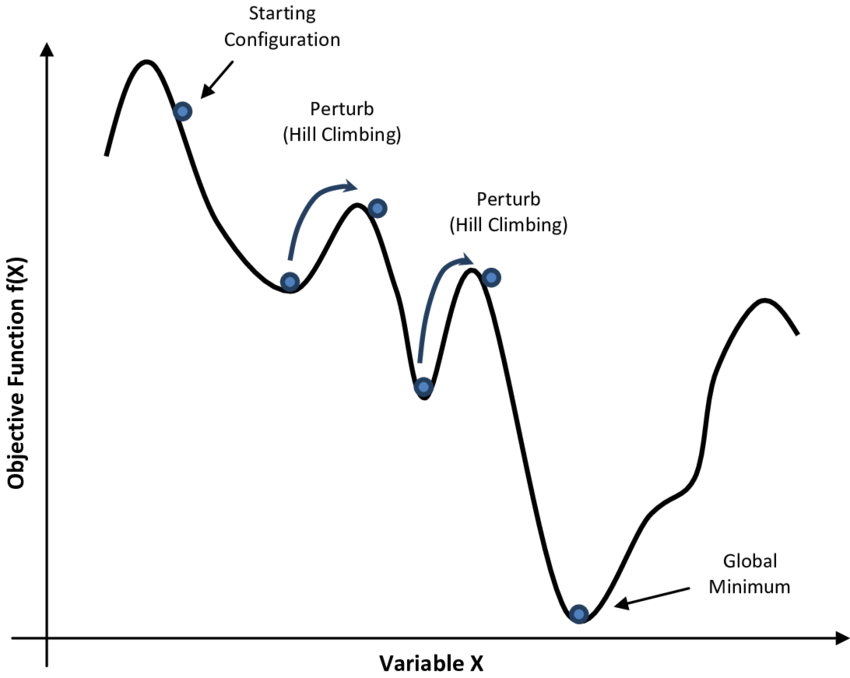
<p style="text-align: center; font-size: 0.85em; margin-top: 5px;
line-height: 1.2;">Fig 2. Representación del algoritmo SA.
<i>Tomado de <a href="ref2">[2]</a></p>
</div>

#### Generación de nueva vecindad:
En cada iteración se genera un único vecino alterando la solución actual
mediante dos operadores equiprobables (50% de probabilidad cada uno):
* Swap: selecciona aleatoriamente dos tomas asignadas a días distintos y las
intercambia. Este movimiento no viola la restricción de máximo 6 tomas por día.
* Move: Extrae una toma aleatoria y la reubica en un día distinto diferente,
procurando no violar la restricción antes mencionada, y permitiendo agregar
un día extra de grabación.

#### Esquema de Enfriamiento:
Para el control de la temperatura ($T$), se ha descartado el enfriamiento
geométrico tradicional, haciendo uso de la ecuación de Lundy-Mees [[3](#ref3)]
$\left( T_{k+1}=\frac{T_k}{1+ \beta \cdot T_K} \right)$. Esta fórmula provoca
un descenso rápido cuando T es alta (evitando el desperdicio de cómputo en
búsquedas aleatorias excesivas) y, crucialmente, ralentiza el enfriamiento de
forma extrema cuando T se acerca a cero. Esto permite una fase de "recocido
lento" o fine-tuning mucho más exhaustiva en las iteraciones finales,
aumentando la probabilidad de encontrar el óptimo global en instancias
complejas del TSP.

In [ ]:
def probabilidad(T: float, d: float) -> bool:
    """
    Función de probabilidad para aceptar peores soluciones
    :param T: Temperatura
    :param d:
    :return:
    """
    if d < 0: return True
    if T <= 1e-9: return False
    return random.random() < math.exp(-d / T)

def bajar_temperatura_lundy_mees(T: float, beta: float = 0.0001) -> float:
    """
    Función de descenso de temperatura basado en la ecuación de Lundy-Mess
    :param T: Temperatura
    :param beta: coeficiente
    :return:
    """
    return T / (1 + beta * T)

def generar_vecina_sa(
        solucion: SolutionType,
        max_tomas: int = 6
) -> SolutionType:
    vecino = list(solucion) #copy
    num_tomas = len(vecino)
    # Experimentalmente, se ha observado que tener equiprobabilidad, permite
    # converger a una solucion minima en distintas pruebas aleatorias.
    if random.random() > 0.5: #swap
        while True:
            t1 = random.randint(0, num_tomas-1)
            t2 = random.randint(0, num_tomas-1)
            if vecino[t1] != vecino[t2]:
                vecino[t1], vecino[t2] = vecino[t2], vecino[t1]
                return normalizar_solucion(vecino)
    else:  # mover una toma a otro dia valido
        while True:
            toma = random.randint(0, num_tomas-1)
            dia_origen = vecino[toma]
            max_dia = max(vecino)
            dia_destino = random.randint(0, max_dia + 2)
            if dia_origen != dia_destino:
                if vecino.count(dia_destino) < max_tomas:
                    vecino[toma] = dia_destino
                    return normalizar_solucion(vecino)

In [9]:
def recocido_simulado(
        tomas:TakesType,
        TEMPERATURA: float,
        solucion_inicial: Optional[SolutionType] = None,
        min_temp: float = 0.0001,
        verbose: bool = False
) -> Tuple[SolutionType, NumericType]:
    if solucion_inicial:
        solucion_referencia = list(solucion_inicial)
    else:
        solucion_referencia = random.sample(list(range(30)), 30)
    distancia_referencia = costo_total(solucion_referencia, tomas)

    mejor_solucion = list(solucion_referencia)  #x* del pseudocodigo
    mejor_distancia = distancia_referencia  #F* del pseudocodigo

    N = 0
    last_n = 0

    while TEMPERATURA > min_temp: # no converge
        N += 1
        #Genera una solución vecina
        vecina = generar_vecina_sa(solucion_referencia, 6)
        costo_vecina = costo_total(vecina, tomas)
        delta = costo_vecina - distancia_referencia
        #Si la nueva vecina es mejor se cambia
        #Si es peor se cambia según una probabilidad que depende de T y delta
        # (distancia_referencia - distancia_vecina)
        if delta < 0 or probabilidad(TEMPERATURA, delta):
            solucion_referencia = list(vecina)
            distancia_referencia = costo_vecina

            #Si es la mejor solución de todas se guarda(siempre!!!)
            if distancia_referencia < mejor_distancia:
                last_n = N
                mejor_solucion = list(vecina)
                mejor_distancia = distancia_referencia

        #Bajamos la temperatura
        TEMPERATURA = bajar_temperatura_lundy_mees(TEMPERATURA)
    if verbose:
        print(f"La mejor solución encontrada después de {last_n} iteraciones, es ", end="")
        print(mejor_solucion, mejor_distancia)
    return mejor_solucion, mejor_distancia

In [10]:
sol_sa, dist_sa = recocido_simulado(TOMAS, TEMPERATURA=100, min_temp=0.025,  verbose=True)
visualizar_solucion(sol_sa, TOMAS)

La mejor solución encontrada después de 49484 iteraciones, es [2, 2, 1, 1, 1, 0, 0, 3, 0, 3, 3, 2, 1, 4, 1, 0, 4, 4, 4, 2, 3, 2, 4, 4, 0, 3, 0, 2, 3, 1] 27


,Sesión Toma 1,Sesión Toma 2,Sesión Toma 3,Sesión Toma 4,Sesión Toma 5,Sesión Toma 6,Costo
Jornada,,,,,,,
Día 1,"Toma 5, Actores: 0,1,3,4","Toma 6, Actores: 0,1,3,4","Toma 8, Actores: 0,1,3","Toma 15, Actores: 3,9","Toma 24, Actores: 0,1,3,9","Toma 26, Actores: 3,4",5
Día 2,"Toma 2, Actores: 1,4,6","Toma 3, Actores: 0,1,6,7","Toma 4, Actores: 1,3,7","Toma 12, Actores: 0,3,4","Toma 14, Actores: 0,1,6","Toma 29, Actores: 0,3",6
Día 3,"Toma 0, Actores: 0,1,2,3,4","Toma 1, Actores: 2,3,4","Toma 11, Actores: 0,1,2,3,5","Toma 19, Actores: 0,2,3,4","Toma 21, Actores: 0,1,2,3","Toma 27, Actores: 0,3",6
Día 4,"Toma 7, Actores: 0,1,5","Toma 9, Actores: 0,1,5,8","Toma 10, Actores: 0,1,2,4,7","Toma 20, Actores: 5,7","Toma 25, Actores: 0,2,4,8","Toma 28, Actores: 0,4,5",7
Día 5,"Toma 13, Actores: 0,2,5","Toma 16, Actores: 0,2","Toma 17, Actores: 2,5","Toma 18, Actores: 0,2","Toma 22, Actores: 0,2","Toma 23, Actores: 2,5",3
Total,,,,,,,27


### Experimento:
Después de ejecutar 100 veces el algoritmo de búsqueda local con entornos
variables, se puede inducir que el mínimo al que tiende a converger entre un
80~85% de las veces es a 27 unidades salariales.

Por otra parte, al ejecutar 100 veces el algoritmo de SA, también tiende a
converger a 27 unidades salariales. Sin embargo, la distribución de frecuencia
de este valor es de un 98~99%

In [11]:
def graficar_distribucion(lista_resultados, nombre_algoritmo):
    """
    Genera un histograma/gráfico de barras mostrando el porcentaje
    de veces que el algoritmo encontró cada solución.\n
    Código sugerido por Gemini 3.1 Pro con modificaciones hechas por el autor
    """
    total_ejecuciones = len(lista_resultados)
    conteo = Counter(lista_resultados)
    costos_unicos = sorted(conteo.keys())
    frecuencias = [conteo[costo] for costo in costos_unicos]
    porcentajes = [(freq / total_ejecuciones) * 100 for freq in frecuencias]
    fig, ax = plt.subplots(figsize=(10, 6))
    colores = ['#3498db' for c in costos_unicos]
    barras = ax.bar(costos_unicos, porcentajes, color=colores, edgecolor='black', alpha=0.8)
    for barra in barras:
        height = barra.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(barra.get_x() + barra.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')
    ax.set_xlabel('Costo de la Solución (Función Objetivo)', fontsize=12)
    ax.set_ylabel('Frecuencia de Aparición (%)', fontsize=12)
    ax.set_title(
        f'Distribución de Resultados {nombre_algoritmo} (N={total_ejecuciones})',
        fontsize=14, fontweight='bold'
    )
    ax.set_xticks(costos_unicos)
    ax.set_xticklabels(costos_unicos)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.ylim(0, max(porcentajes) * 1.15)
    plt.tight_layout()
    plt.show()

In [12]:
max_iters = 100
distancias_obtenidas = []
for _ in range(1, max_iters+1):
    solucion, costo = busqueda_local_con_entornos_variables(
        tomas=TOMAS,
        max_iter=2000
    )
    if costo <= 27:
        soluciones_unicas.add(convertir_solucion(solucion))
    distancias_obtenidas.append(costo)

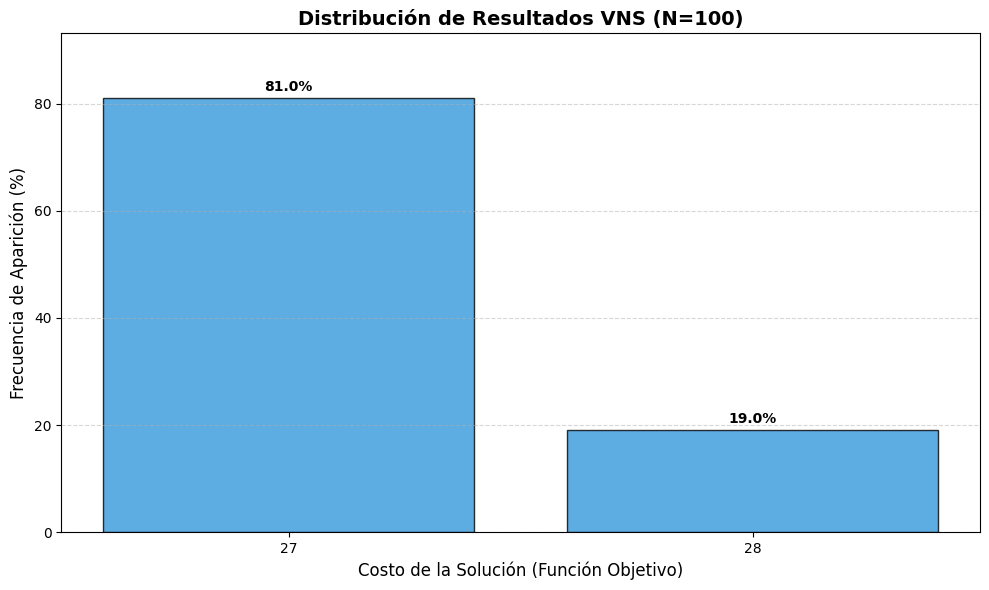

In [13]:
graficar_distribucion(distancias_obtenidas, "VNS")

In [14]:
max_iters = 100
distancias_obtenidas = []
for _ in range(1, max_iters+1):
    solucion, costo = recocido_simulado(
        tomas=TOMAS,
        TEMPERATURA=100,
        min_temp=0.025
    )
    if costo <= 27:
        soluciones_unicas.add(convertir_solucion(solucion))
    distancias_obtenidas.append(costo)

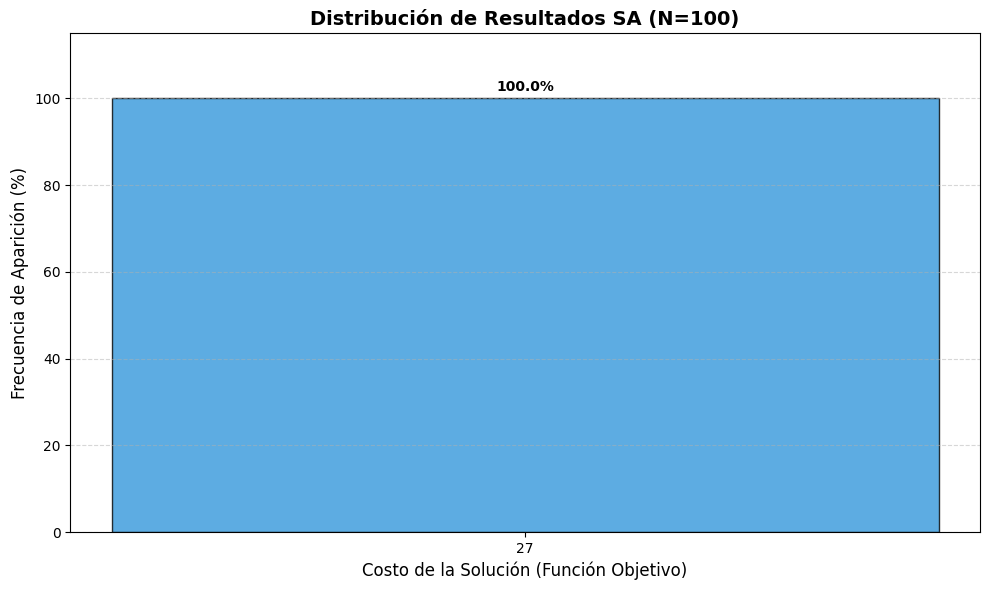

In [15]:
graficar_distribucion(distancias_obtenidas, "SA")

In [16]:
print(len(soluciones_unicas))

167


# Conclusiones:
Al usarse dos motores estocásticos que se pueden definir de _filosofías_
opuestas (VNS explorando geométricamente por vecindades, y SA explorando
termodinámicamente por trayectorias probabilísticas), convergen
consistentemente a la misma barrera aparentemente imbatible de 27 unidades
salariales a través de cientos de caminos distintos. La multiplicidad de
estas soluciones refuerzan la hipótesis de que 27 es el óptimo global real.

Otro motivo por el cual se decidió hacer el experimento con 100 iteraciones
en cada algoritmo es para _encontrar_ cuántas soluciones únicas existen.
Matemáticamente hablando, el espacio de búsqueda no tiene una forma de
_embudo_ como se esperaría, con un único punto profundo en el fondo, sino más
bien tiene la forma de un "_campo de golf_".

En las pruebas se encontraron al menos 170 combinaciones estructuralmente
distintas (se recuerda que ya se ha limpiado los casos isomorfos con el
método `convertir_solucion` haciendo uso de las propiedades de los
`frozenset`) que satisfacen las restricciones de máximo 6 tomas por día, y
tienen por coste 27 unidades salariales.



In [17]:
# Guardamos las soluciones únicas, para un siguiente experimento seguir
# expandiendo aquellas nuevas soluciones únicas que no se han explorado todavía.
with open(soluciones_unicas_path, "wb") as f:
    pickle.dump(soluciones_unicas, f)

# Nota sobre el uso de herramientas de IA generativa

En la elaboración de este notebook se emplearon herramientas de inteligencia artificial generativa de manera puntual y como apoyo en la presentación de resultados, específicamente para:

* Asistencia en la generación de tablas de resultados en formato legible, con el objetivo de mejorar la claridad y facilitar la interpretación de los resultados finales por parte del usuario.
* Apoyo en la generación de código para la visualización gráfica de los distintos experimentos realizados con los algoritmos Variable Neighborhood Search (VNS) y Simulated Annealing (SA).

El código final utilizado, incluyendo las modificaciones, la integración y la adaptación a los objetivos del experimento, es de autoría propia o se basa en material proporcionado en clase y en recursos disponibles públicamente, los cuales han sido reinterpretados, modificados y desarrollados para los fines de este trabajo.


# Bibliografía:
* [1<a id="ref1"></a>] P. Hansen, N. Mladenović, y J. A. Moreno Pérez, "Variable neighbourhood search: methods and applications", 4OR, vol. 6, no. 4, pp. 319-360, 2008, doi: 10.1007/s10288-008-0089-1.
* [2<a id="ref2"></a>] F. Sancho Caparrini, "Simulated Annealing in NetLogo", Blog de Fernando Sancho Caparrini - Universidad de Sevilla. [En línea]. Disponible en: https://www.cs.us.es/~fsancho/Blog/posts/Simulated_Annealing_in_NetLogo.md. [Accedido: 25-feb-2026].
* [3<a id="ref3"></a>] M. Lundy y A. Mees, "Convergence of an annealing algorithm," Mathematical Programming, vol. 34, no. 1, pp. 111–124, 1986.